In [14]:
txt = 'KoNLPy는 한국어 정보처리를 위한 파이썬 패키지입니다. 설치법은 이 곳을 참고해주세요. NLP를 처음 시작하시는 분들은 시작하기 에서 가볍게 기본 지식을 습득할 수 있습니다.'

In [4]:
import nltk

word_list = nltk.word_tokenize(txt)
word_list

['KoNLPy는',
 '한국어',
 '정보처리를',
 '위한',
 '파이썬',
 '패키지입니다',
 '.',
 '설치법은',
 '이',
 '곳을',
 '참고해주세요',
 '.',
 'NLP를',
 '처음',
 '시작하시는',
 '분들은',
 '시작하기',
 '에서',
 '가볍게',
 '기본',
 '지식을',
 '습득할',
 '수',
 '있습니다',
 '.']

In [6]:
from nltk.stem import PorterStemmer  # 한글 처리 저장 못함
stemmer = PorterStemmer()
[stemmer.stem(word) for word in word_list]

['konlpy는',
 '한국어',
 '정보처리를',
 '위한',
 '파이썬',
 '패키지입니다',
 '.',
 '설치법은',
 '이',
 '곳을',
 '참고해주세요',
 '.',
 'nlp를',
 '처음',
 '시작하시는',
 '분들은',
 '시작하기',
 '에서',
 '가볍게',
 '기본',
 '지식을',
 '습득할',
 '수',
 '있습니다',
 '.']

# KoNLPy(코엔엘파이)
- KoNLPY는 한국어 자연어 처리(Natural Language Processing) 파이썬 라이브러리이다.  한국어 처리를 위한 tokenize, 형태소 분석, 어간추출, 품사부착(POS Tagging) 등의 기능을 제공한다. 
- http://KoNLPy.org/ko/latest/
- 기존의 개발된 다양한 형태소 분석기를 통합해서 동일한 interface로 호출 할 수 있게 해준다.

## KoNLPy 설치 순서
1. Java 실행환경 설치
2. JPype1 설치
3. koNLPy 설치

### 1. Java설치
- https://www.oracle.com/java/technologies/downloads/
- OS에 맞게 다운로드 한다.
- 시스템 환경변수 설정
    - `JAVA_HOME` : 설치 경로 지정
    - `Path` : `설치경로\bin` 경로 지정

In [7]:
!pip install jpype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 8.6 MB/s eta 0:00:00


### 2. JPype1 설치

- 파이썬에서 자바 모듈을 호출하기 위한 연동 패키지
- 설치: `!pip install JPype1`

### 3. KoNLPy 설치
- `pip install konlpy`

In [ ]:
!pip install konlpy

## 형태소 분석기/사전
- 형태소 사전을 내장하고 있으며 형태소 분석 함수들을 제공하는 모듈

### KoNLPy 제공 형태소 분석기
- Open Korean Text
    - 트위터에서 개발
    - https://github.com/open-korean-text/open-korean-text
- Hannanum(한나눔)
    - KAIST Semantic Web Research Center 에서 개발
    - http://semanticweb.kaist.ac.kr/hannanum/
- Kkma(꼬꼬마)
    - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/
- Komoran(코모란)
    - Shineware에서 개발.
    - 오픈소스버전과 유료버전이 있음
    - https://github.com/shin285/KOMORAN
- Mecab(메카브) 
    - 일본어용 형태소 분석기를 한국에서 사용할 수 있도록 수정
    - windows에서는 설치가 안됨
    - https://bitbucket.org/eunjeon/mecab-ko


## 형태소 분석기 공통 메소드
- `morphs(string)` : 형태소 단위로 토큰화(tokenize)
- `nouns(string)` : 명사만 추출하여 토큰화(tokenize)    
- `pos(string)`: 품사 부착
    - 형태소 분석기 마다 사용하는 품사태그가 다르다.
        - https://konlpy-ko.readthedocs.io/ko/v0.5.2/morph/
- `tagset`: 형태소 분석기가 사용하는 품사태그 설명하는 속성. 

## KoNLPy 제공 말뭉치
1. kolaw: 대한민국 헌법 말뭉치
    - constitution.txt
2. kobill: 대한민국 국회 의안(국회에서 심의하는 안건-법률, 예산등) 말뭉치
    -1809890.txt ~ 1809899.txt

In [11]:
from konlpy.corpus import kolaw, kobill

print(kolaw.fileids())

print(kobill.fileids())


['constitution.txt']
['1809896.txt', '1809897.txt', '1809895.txt', '1809894.txt', '1809890.txt', '1809891.txt', '1809893.txt', '1809892.txt', '1809899.txt', '1809898.txt']


In [16]:
with kolaw.open('constitution.txt') as f :
    txt1 = f.read()
print(txt1[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [18]:
with kobill.open('1809890.txt') as f2 :
    txt2 = f2.read()
print(txt2[:50])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의


In [20]:
sample = 'KT는 18일 “한화 이글스와 FA 계약을 체결한 엄상백의 보상 선수로 외야수 장진혁(31)을 지명했다”라고 발표했다. 장진혁은 2016 신인 드래프트 2차 4라운드(39순위) 지명으로 한화에 입단한 외야수다. KBO리그 통산 390경기 타율 2할4푼4리(956타수 233안타) 12홈런 100타점 144득점 37도루 OPS .657을 기록했다. 올해는 1군에서 99경기 타율 2할6푼3리(289타수 76안타) 9홈런 44타점 56득점 14도루 OPS .747을 기록하며 2019년(113경기) 이후 가장 많은 경기에 출장했고 데뷔 후 가장 좋은 성적을 거뒀다. 1군에서 아직 많은 활약을 하지 못한 장진혁은 퓨처스리그에서는 통산 194경기 타율 2할9푼(541타수 157안타) 12홈런 97타점 113득점 37도루 OPS .871을 기록하며 좋은 타격 능력을 과시했다. 올해는 20경기 타율 3할6푼4리(55타수 20안타) 2홈런 9타점 12득점 4도루 OPS 1.065 맹타를 휘둘렀다.'

In [25]:
# 형태소 분석기 class를 import
from konlpy.tag import Okt

okt = Okt() # 형태소분석기 객체 생성
# 형태소 단위 토큰화
# tokens = okt.morphs(sample)
tokens = okt.morphs(sample, stem=True) # 원형 복원

print(type(tokens), len(tokens))
print(tokens)

# 명사만 추출
noun_tokens = okt.nouns(sample)
noun_tokens

<class 'list'> 221
['KT', '늘다', '18일', '“', '한화', '이글스', '와', 'FA', '계약', '을', '체결', '한', '엄상', '백', '의', '보상', '선수', '로', '외야수', '장진', '혁', '(', '31', ')', '을', '지명', '하다', '”', '라고', '발표', '하다', '.', '장진혁', '은', '2016', '신인', '드래프트', '2', '차', '4', '라운드', '(', '39', '순위', ')', '지명', '으로', '한화', '에', '입단', '한', '외야수', '다', '.', 'KBO', '리그', '통산', '390', '경기', '타율', '2', '하다', '4', '푼', '4', '리', '(', '956', '타수', '233', '안타', ')', '12', '홈런', '100', '타점', '144', '득점', '37', '도루', 'OPS', '.', '657', '을', '기록', '하다', '.', '올해', '는', '1', '군', '에서', '99', '경기', '타율', '2', '하다', '6', '푼', '3', '리', '(', '289', '타수', '76', '안타', ')', '9', '홈런', '44', '타점', '56', '득점', '14', '도루', 'OPS', '.', '747', '을', '기록', '하다', '2019년', '(', '113', '경기', ')', '이후', '가장', '많다', '경기', '에', '출장', '하다', '데뷔', '후', '가장', '좋다', '성적', '을', '거두다', '.', '1', '군', '에서', '아직', '많다', '활약', '을', '하다', '못', '한', '장진혁', '은', '퓨처스리그', '에서는', '통산', '194', '경기', '타율', '2', '하다', '9', '푼', '(', '541', '타수', '157', '안타', 

['한화',
 '이글스',
 '계약',
 '체결',
 '엄상',
 '보상',
 '선수',
 '외야수',
 '장진',
 '혁',
 '지명',
 '발표',
 '장진혁',
 '신인',
 '드래프트',
 '차',
 '라운드',
 '순위',
 '지명',
 '한화',
 '입단',
 '외야수',
 '리그',
 '통산',
 '경기',
 '타율',
 '푼',
 '리',
 '타수',
 '안타',
 '홈런',
 '타점',
 '득점',
 '도루',
 '기록',
 '올해',
 '군',
 '경기',
 '타율',
 '푼',
 '리',
 '타수',
 '안타',
 '홈런',
 '타점',
 '득점',
 '도루',
 '기록',
 '경기',
 '이후',
 '가장',
 '경기',
 '출장',
 '데뷔',
 '후',
 '가장',
 '성적',
 '군',
 '활약',
 '못',
 '장진혁',
 '퓨처스리그',
 '통산',
 '경기',
 '타율',
 '푼',
 '타수',
 '안타',
 '홈런',
 '타점',
 '득점',
 '도루',
 '기록',
 '타격',
 '능력',
 '과시',
 '올해',
 '경기',
 '타율',
 '푼',
 '리',
 '타수',
 '안타',
 '홈런',
 '타점',
 '득점',
 '도루',
 '맹타']

In [27]:
# 품사 부착 (POS_Tagging)
okt_pos = okt.pos(sample)
okt_pos

[('KT', 'Alpha'),
 ('는', 'Verb'),
 ('18일', 'Number'),
 ('“', 'Foreign'),
 ('한화', 'Noun'),
 ('이글스', 'Noun'),
 ('와', 'Josa'),
 ('FA', 'Alpha'),
 ('계약', 'Noun'),
 ('을', 'Josa'),
 ('체결', 'Noun'),
 ('한', 'Josa'),
 ('엄상', 'Noun'),
 ('백', 'Suffix'),
 ('의', 'Josa'),
 ('보상', 'Noun'),
 ('선수', 'Noun'),
 ('로', 'Josa'),
 ('외야수', 'Noun'),
 ('장진', 'Noun'),
 ('혁', 'Noun'),
 ('(', 'Punctuation'),
 ('31', 'Number'),
 (')', 'Punctuation'),
 ('을', 'Josa'),
 ('지명', 'Noun'),
 ('했다', 'Verb'),
 ('”', 'Foreign'),
 ('라고', 'Josa'),
 ('발표', 'Noun'),
 ('했다', 'Verb'),
 ('.', 'Punctuation'),
 ('장진혁', 'Noun'),
 ('은', 'Josa'),
 ('2016', 'Number'),
 ('신인', 'Noun'),
 ('드래프트', 'Noun'),
 ('2', 'Number'),
 ('차', 'Noun'),
 ('4', 'Number'),
 ('라운드', 'Noun'),
 ('(', 'Punctuation'),
 ('39', 'Number'),
 ('순위', 'Noun'),
 (')', 'Punctuation'),
 ('지명', 'Noun'),
 ('으로', 'Josa'),
 ('한화', 'Noun'),
 ('에', 'Josa'),
 ('입단', 'Noun'),
 ('한', 'Josa'),
 ('외야수', 'Noun'),
 ('다', 'Josa'),
 ('.', 'Punctuation'),
 ('KBO', 'Alpha'),
 ('리그', 'Noun

In [28]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [33]:
#OKT 기능
sample2 = '이것도 되나욬ㅋㅋㅋ'
test1 = okt.morphs(sample2, norm=True) # norm=True : 비속어 처리
print(test1)
print(okt.normalize(sample2)) # 비속어 처리한 문장 반환
print(okt.normalize('반갑습니당'))

['이', '것', '도', '되나요', 'ㅋㅋㅋ']
이것도 되나요ㅋㅋㅋ
반갑습니다


# Konlpy와 nltk를 이용해 헌법 text 분석하기

In [56]:
from nltk import Text, FreqDist
from konlpy.tag import Okt
from konlpy.corpus import kolaw
from wordcloud import WordCloud

with kolaw.open('constitution.txt') as fr :
    constitution = fr.read()

constitution[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [57]:
# 토큰화 -> 형태소 단위
okt = Okt()
## 품사 부착
tokens = okt.pos(constitution)
print(len(tokens))
print(tokens[:5])

8796
[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa')]


In [58]:
# 명사, 동사만 추출
tokens = [token for token, pos in tokens if pos in ['Verb', 'Noun']]
tokens


['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '빛나는',
 '우리',
 '국민',
 '운동',
 '건립',
 '된',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '로써',
 '민족',
 '단결',
 '공고',
 '하고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '하며',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '하여',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '하고',
 '능력',
 '최고',
 '도로',
 '발휘',
 '하게',
 '하며',
 '자유',
 '권리',
 '따르는',
 '책임',
 '의무',
 '완수',
 '하게',
 '하여',
 '안',
 '국민',
 '생활',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '할',
 '것',
 '다짐',
 '하면서',
 '제정',
 '되고',
 '차',
 '걸쳐',
 '개정',
 '된',
 '헌법',
 '이제',
 '국회',
 '의결',
 '거쳐',
 '국민투표',
 '개정',
 '한다',
 '제',
 '장',
 '강',
 '제',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '나온다',
 '제',
 '대한민국',
 '국민',
 '되는',
 '요건',
 '법률',
 '정',
 '한다',
 '국가',
 '법률',
 '정',
 '하는',
 '바',
 '재외국민',
 '보호',
 '할',
 '의무',
 '진다',


In [55]:
noun_tokens = okt.nouns(constitution)
noun_tokens[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

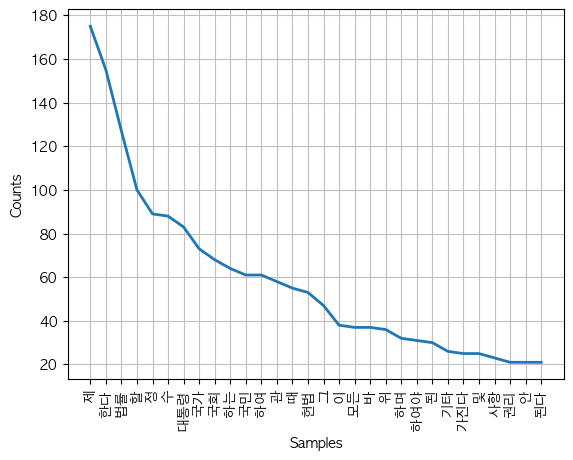

In [60]:
# text 객체 생성해서 EDA 생성

text = Text(tokens, name="대한민국 헌법")
text

# 빈도수 그래프
import matplotlib.pyplot as plt
text.plot(30)
plt.show()

In [62]:
# 특정 단어들의 빈도수
print('법률 : ', text.count('법률'))
print('대통령 : ', text.count('대통령'))
print('국회 : ', text.count('국회'))


법률 :  127
대통령 :  83
국회 :  68


<Figure size 1000x500 with 0 Axes>

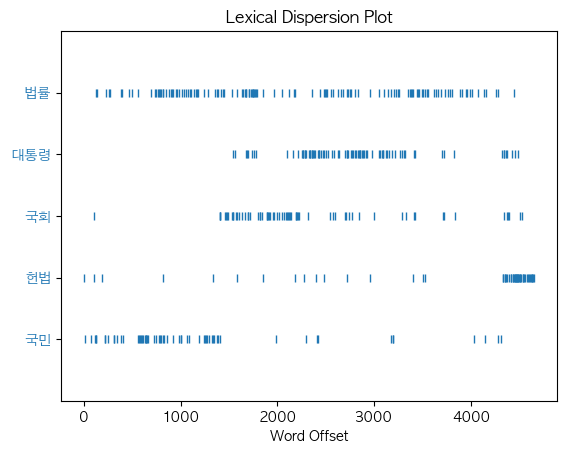

In [64]:
# 특정 단어들의 분포 확인

plt.figure(figsize=(10,5))
text.dispersion_plot(['법률', '대통령','국회', '헌법', '국민'])
plt.show()

In [67]:
fd = text.vocab()
print('총 토큰 수 : ', fd.N())
print('고유 토큰 갯수 : ', fd.B())

print('가장 빈도수 높은 토큰 : ', fd.max())
print('"헌법"의 빈도 수 : ', fd.get('헌법'))

print(f'가장 많이 나온 단어 {fd.max()}의 빈도 수는 {fd.get(fd.max())}입니다')
print(f'가장 많이 나온 단어 {fd.max()}의 비율은 {fd.freq(fd.max()):.5f}입니다')

총 토큰 수 :  4661
고유 토큰 갯수 :  1014
가장 빈도수 높은 토큰 :  제
"헌법"의 빈도 수 :  53
가장 많이 나온 단어 제의 빈도 수는 175입니다
가장 많이 나온 단어 제의 비율은 0.03755입니다


In [68]:
# 빈도 수 순위
fd.most_common(10)

[('제', 175),
 ('한다', 155),
 ('법률', 127),
 ('할', 100),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('하는', 64)]

In [69]:
import pandas as pd

pd.DataFrame(fd.most_common(10), columns=['단어', '빈도수'])

,단어,빈도수
0,제,175
1,한다,155
2,법률,127
3,할,100
4,정,89
5,수,88
6,대통령,83
7,국가,73
8,국회,68
9,하는,64


In [70]:
constisution_df = pd.DataFrame(fd.most_common(), columns=['단어', '빈도수'])
constisution_df.shape

(1014, 2)

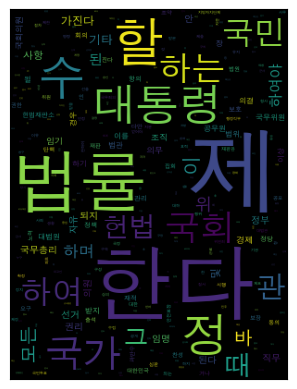

In [86]:
import matplotlib.font_manager as fm
fm.fontManager.ttflist
# 폰트 찾기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Apple' in f.name]

wc = WordCloud(
    font_path=r'/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    max_words=300,
    min_font_size=2,
    max_font_size=100,
    relative_scaling=1,
    width=300,
    height=400
)

wc_img = wc.generate_from_frequencies(fd)
plt.imshow(wc_img)

wc_img.to_file('constitution_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()